In [24]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')
# Import logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
#import sci_kit learn libraries for model building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
#importing metrics for regression model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
logging.info('Import Dataset for Model building...')

In [3]:
url = 'https://raw.githubusercontent.com/vrushali253/cementprediction_model/refs/heads/main/Concrete_Data%20-%20Concrete_Data(1).csv'
df = pd.read_csv(url)
df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
839,153.0,239.0,0.0,200.0,6.0,1002.0,684.0,28,26.86
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28,39.70
207,212.1,0.0,121.6,180.3,5.7,1057.6,779.3,56,34.20
421,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,14,34.24
212,230.0,0.0,118.3,195.5,4.6,1029.4,758.6,56,31.54
...,...,...,...,...,...,...,...,...,...
89,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3,39.30
52,237.5,237.5,0.0,228.0,0.0,932.0,594.0,90,33.12
185,222.4,0.0,96.7,189.3,4.5,967.1,870.3,14,24.45
689,157.0,236.0,0.0,192.0,0.0,935.4,781.2,7,16.89


In [4]:
# checking data columns
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
import statsmodels.api as sm
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis =1)
y = df['Concrete compressive strength(MPa, megapascals) ']


In [6]:
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Mon, 02 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      19:35:17   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
# checking descriptive stats EDA'
# Univariate Analysis
from collections import OrderedDict
stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurtosis()
        
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


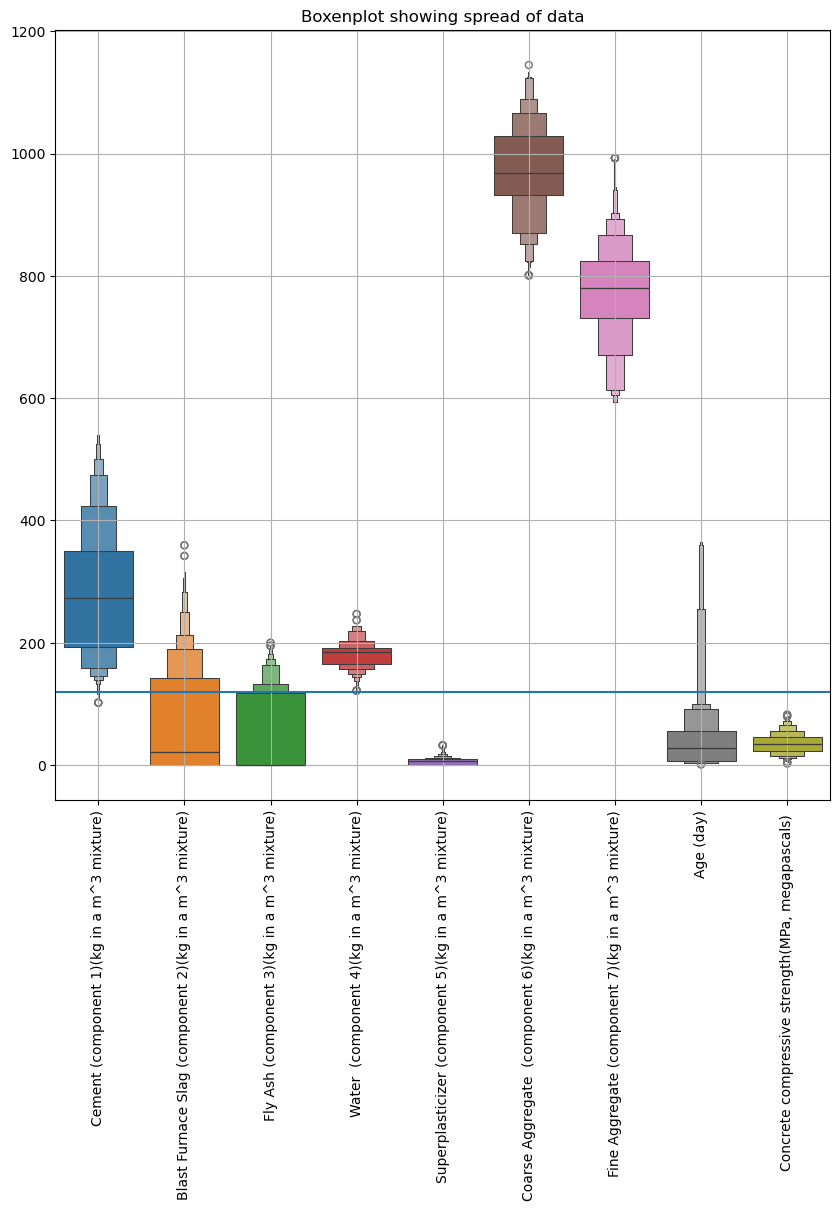

In [10]:
plt.figure(figsize = (10,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot showing spread of data')
plt.grid()
plt.show()



Text(0.5, 1.0, 'Heatmap showing Correlation w.r.t Target Column')

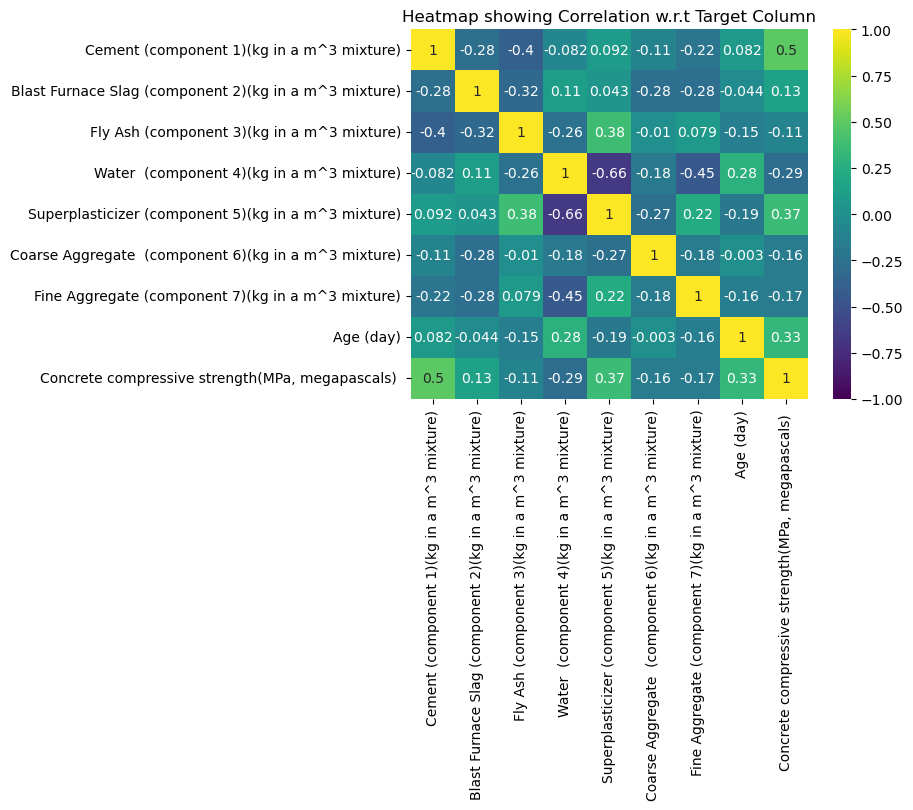

In [11]:
sns.heatmap(df.corr(),annot=True,center=0,vmax =1,vmin=-1,cmap='viridis')
plt.title('Heatmap showing Correlation w.r.t Target Column')

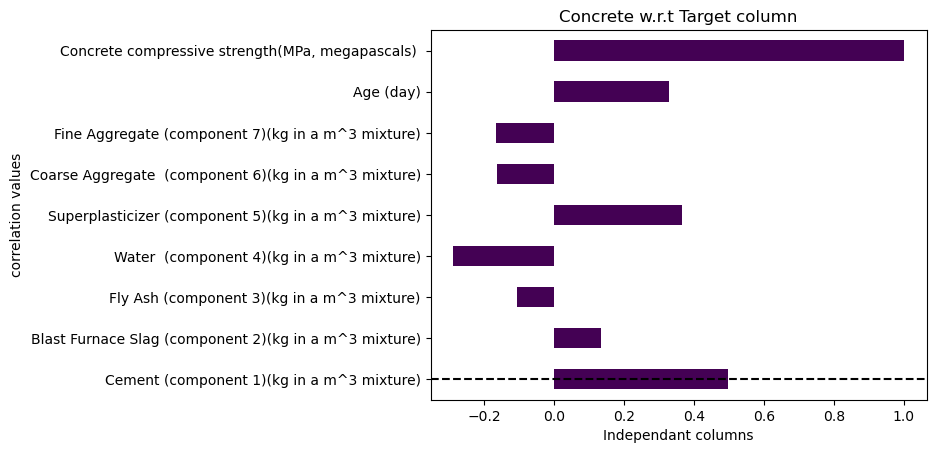

In [12]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh',cmap = 'viridis')
plt.axhline(0,linestyle = '--' ,color = 'black')
plt.title('Concrete w.r.t Target column')
plt.ylabel('correlation values')
plt.xlabel('Independant columns')
plt.show()

In [13]:
#checking top 5 rows of dataset
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
#as dataset contains no categorical columns hence no need of converting categorical column to numerical column
# no missing values present in given dataset

In [27]:
# preventing data leakage
# step01: split the dataset into x and y
# where X: independent columns and Y: is dependant columns that is target column
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis =1)
y = df['Concrete compressive strength(MPa, megapascals) ']
#step 02
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)
#step03
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [33]:
X_train

array([[0.21164384, 0.        , 0.51538462, ..., 0.59709302, 0.78248871,
        0.07417582],
       [0.50913242, 0.        , 0.        , ..., 0.76162791, 0.47415956,
        0.01648352],
       [0.49497717, 0.59126322, 0.        , ..., 0.14854651, 0.7185148 ,
        0.00549451],
       ...,
       [0.20159817, 0.        , 0.64205128, ..., 0.80813953, 0.51404917,
        0.27197802],
       [0.85159817, 0.33055092, 0.        , ..., 0.14854651, 0.47039639,
        0.07417582],
       [0.48401826, 0.        , 0.57948718, ..., 0.36046512, 0.47415956,
        0.07417582]])

In [35]:
#give minimum and maximum value of array
X_train.min()  , X_train.max()

(0.0, 1.0000000000000002)

In [37]:
from sklearn.linear_model import LinearRegression


In [38]:
LR = LinearRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print('Model Accuracy for linear regession:', r2_score(y_test,y_pred_LR))

Model Accuracy for linear regession: 0.5943782479239215


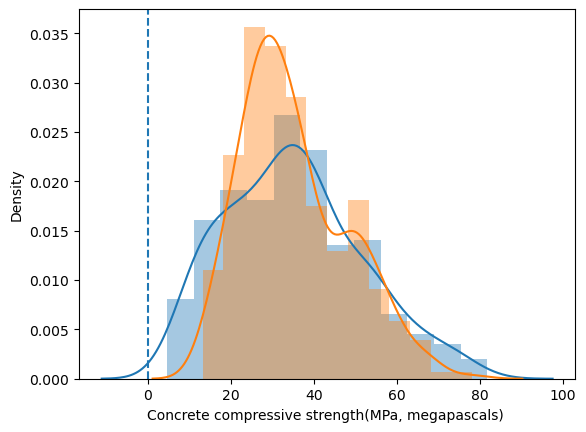

In [57]:
sns.distplot(y_test, label = 'Actual y_test')
sns.distplot(y_pred_LR, label = 'Predicted y_pred_LR')
plt.axvline(0, linestyle = '--')
plt.show()

Text(0, 0.5, 'Y-pred')

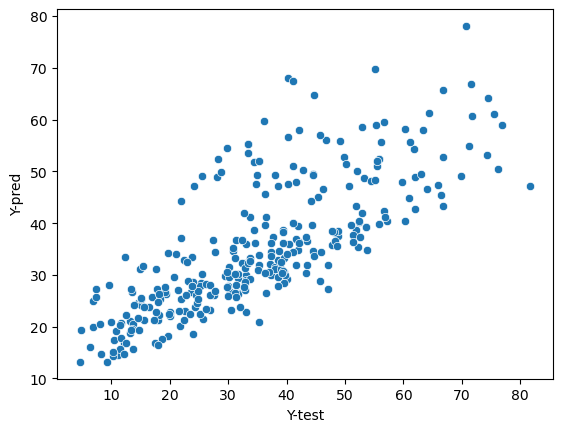

In [55]:
sns.scatterplot(x = y_test , y=y_pred_LR)
plt.xlabel('Y-test')
plt.ylabel('Y-pred')

In [48]:
# Evaluate coefficient
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [49]:
#Evaluate constant value
LR.intercept_

-13.61693264223748